In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime
import os
# Add the project root directory to Python path
import sys
sys.path.append(os.path.abspath(os.path.join(os.path.dirname('__file__'), '..')))

In [ ]:
from src.changePoint import BayesianChangePointAnalyzer

In [ ]:
analyzer = BayesianChangePointAnalyzer(
        data_path='../data/processed/processed_brent_oil_data.csv',
        events_path='../data/processed/event_dataset.csv'
    )


In [4]:
# Load data
data = analyzer.load_data()

Loading Brent oil price data...
Loaded 9011 data points from 1987-05-20 00:00:00 to 2022-11-14 00:00:00
Loading events data...
Loaded 18 significant events


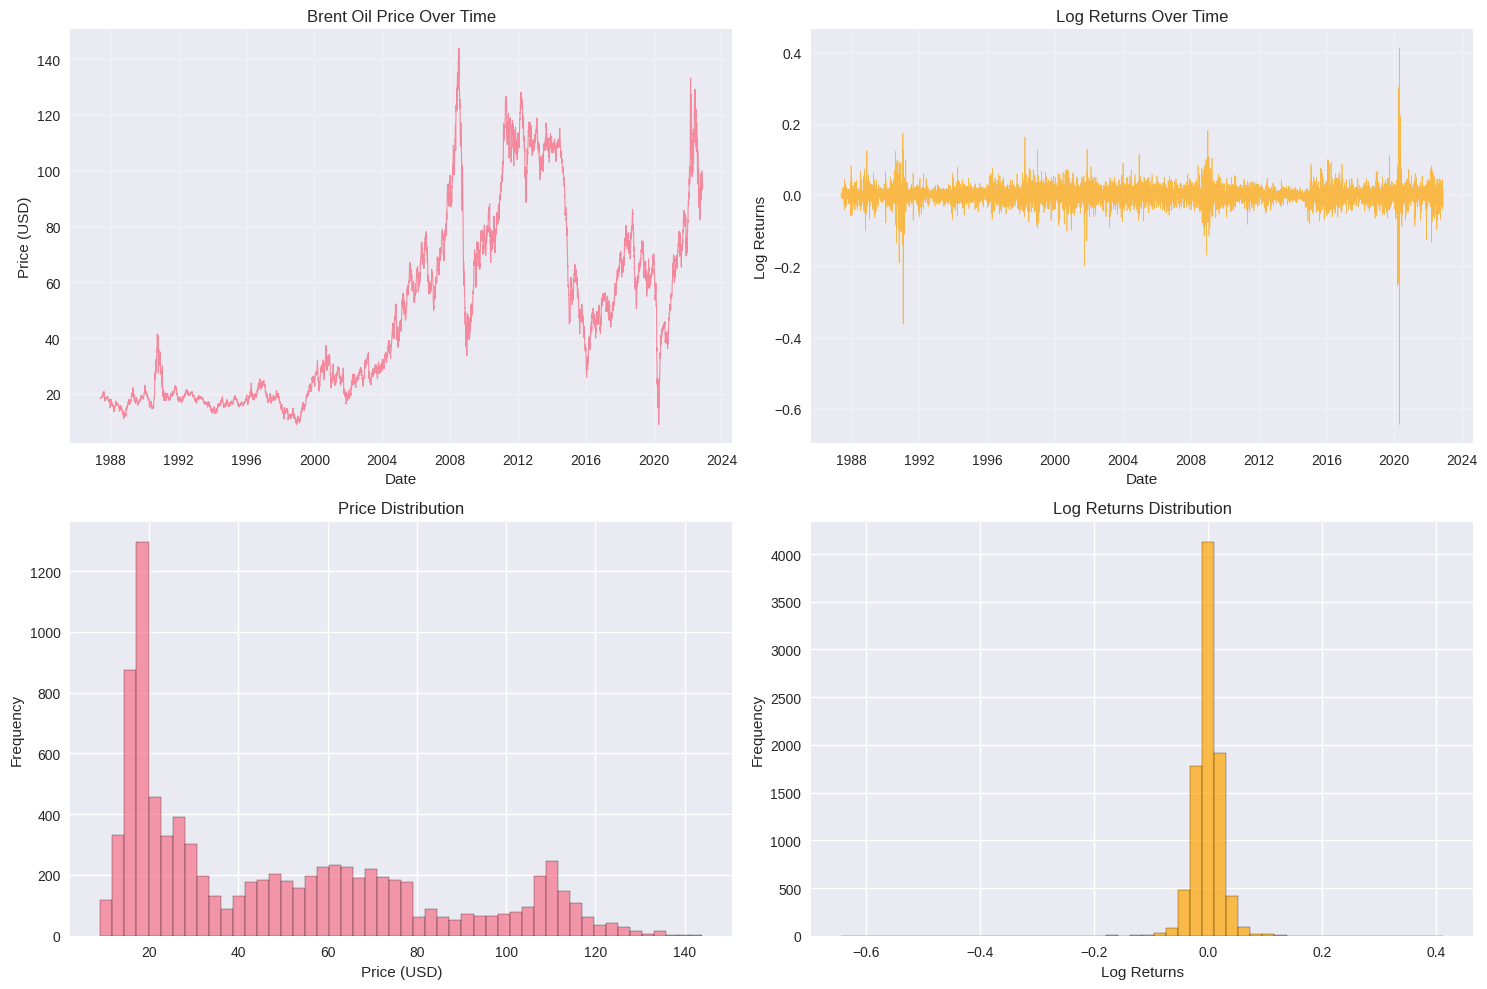


Data Summary Statistics:
Mean Price: $48.42
Price Volatility: 32.86
Mean Log Returns: 0.000179
Log Returns Volatility: 0.025532


In [5]:
 # Plot raw data
analyzer.plot_raw_data()

In [6]:
# Build and run model
model = analyzer.build_change_point_model(n_changepoints=1)
trace = analyzer.run_mcmc(draws=2000, tune=1000, chains=2)

Building Bayesian Change Point model with 1 change point(s)...
Running MCMC with 2000 draws, 1000 tuning steps, and 2 chains...


Output()

MCMC sampling completed!


Checking MCMC convergence...

Parameter Summary:
             mean      sd    hdi_3%   hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
mu_1        0.000   0.000    -0.000     0.001      0.000    0.000    5463.0   
mu_2       -0.000   0.000    -0.001     0.001      0.000    0.000    7499.0   
sigma_1     0.023   0.000     0.023     0.023      0.000    0.000    6197.0   
sigma_2     0.029   0.000     0.028     0.030      0.000    0.000    5373.0   
tau      5388.754  20.536  5343.000  5417.000      0.834    0.531     656.0   

         ess_tail  r_hat  
mu_1       3204.0    1.0  
mu_2       3311.0    1.0  
sigma_1    3145.0    1.0  
sigma_2    3355.0    1.0  
tau         836.0    1.0  

R-hat values (should be close to 1.0):
  mu_1: 1.000 ✓
  mu_2: 1.000 ✓
  sigma_1: 1.000 ✓
  sigma_2: 1.000 ✓
  tau: 1.000 ✓


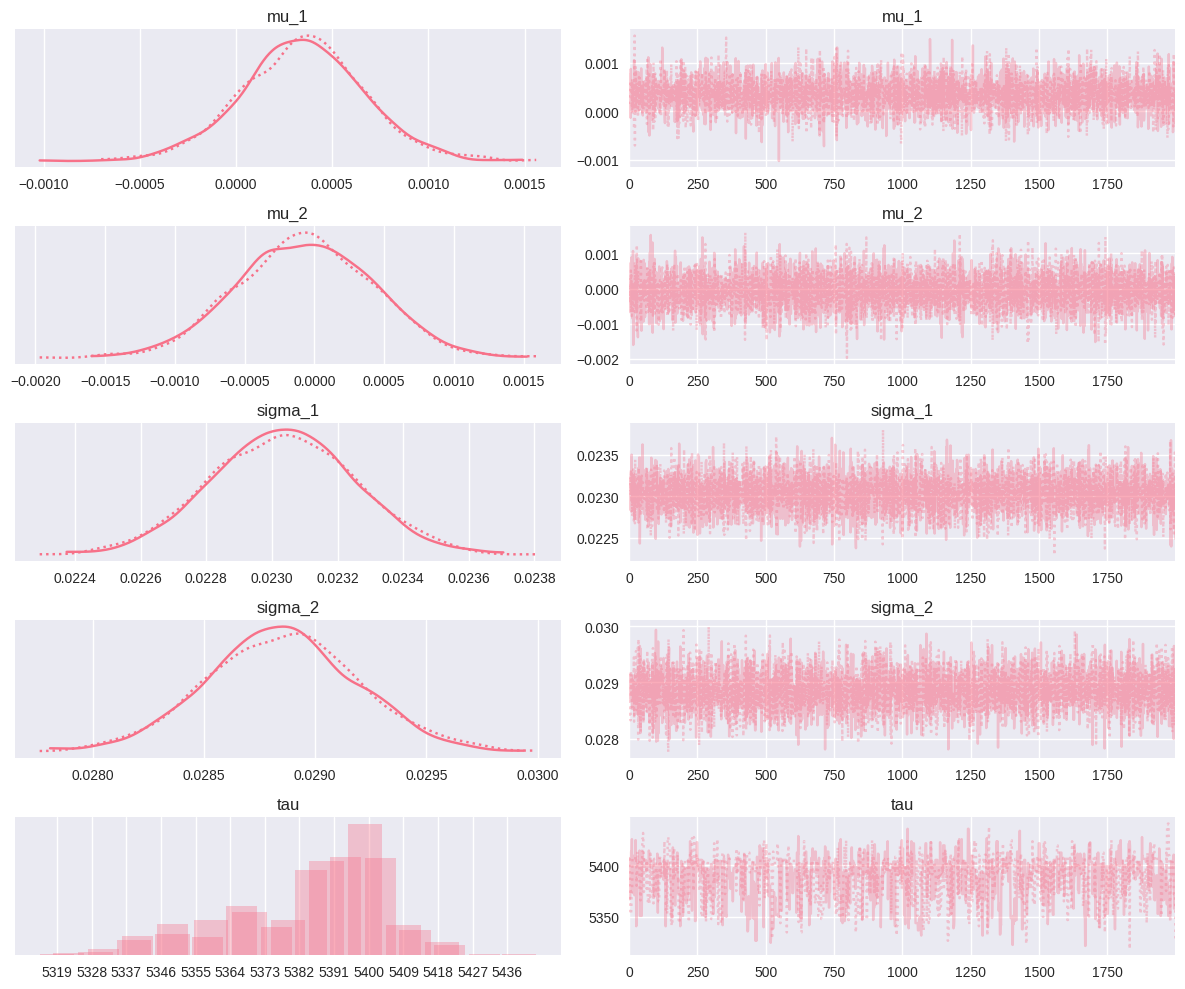

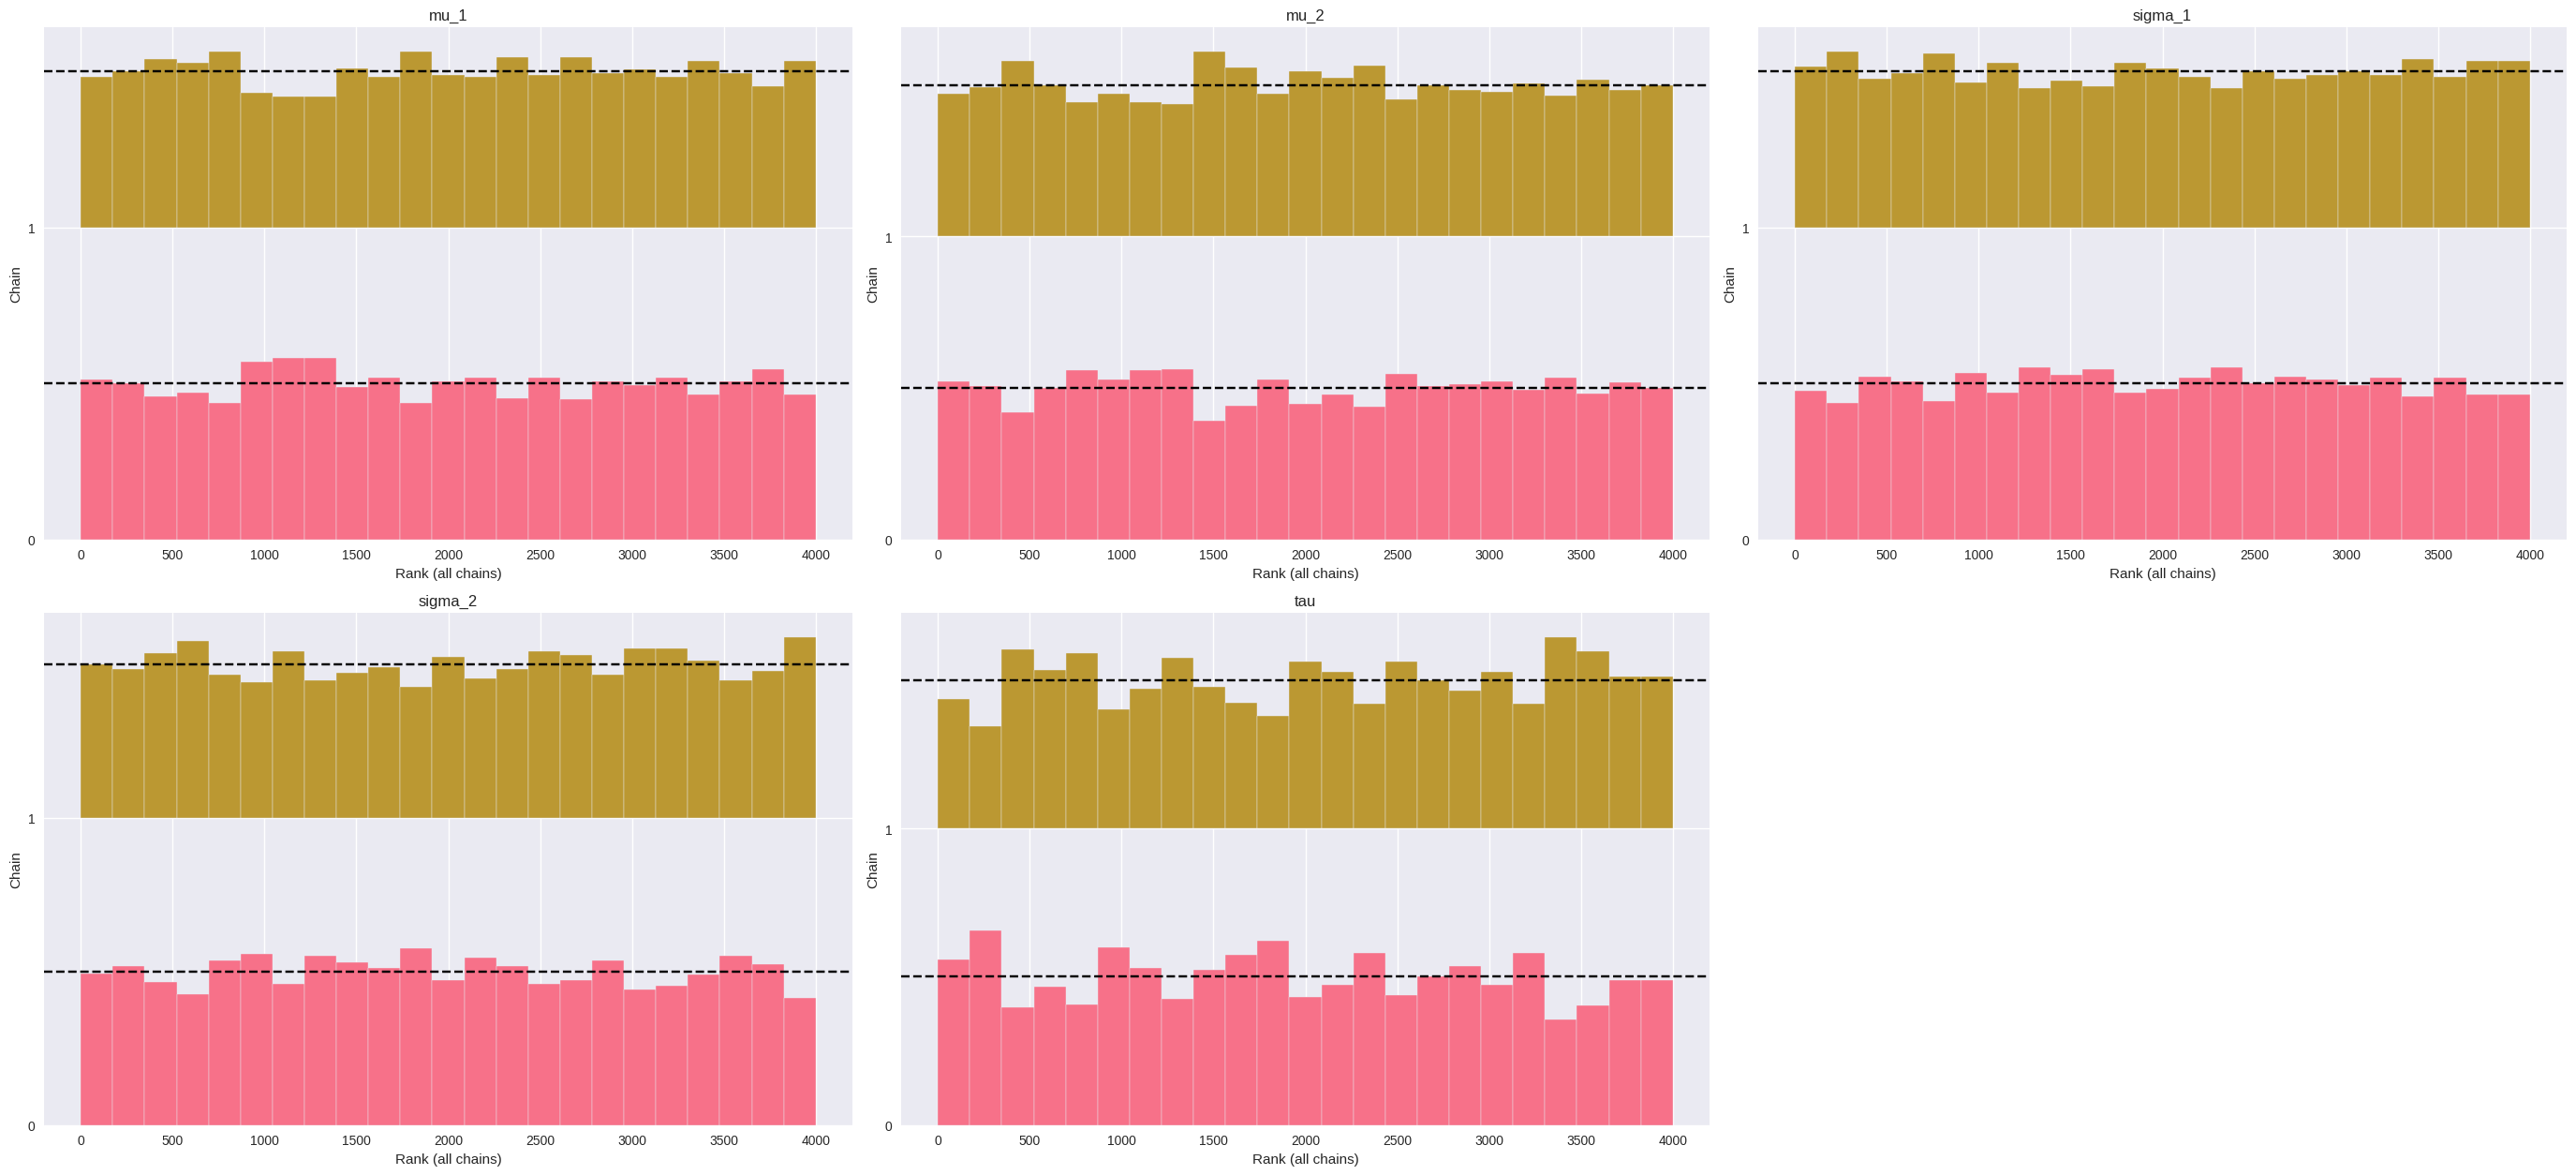

In [ ]:
# Check convergence
summary = analyzer.check_convergence()

Analyzing detected change points...

Change Point Analysis:
Most probable change point: 2008-07-25
95% credible interval: 2008-05-28 to 2008-09-23

Price Impact Analysis:
Mean price before change point: $29.68
Mean price after change point: $76.30
Price change: +157.08%
Volatility before change point: 21.68
Volatility after change point: 26.21
Volatility change: +20.86%


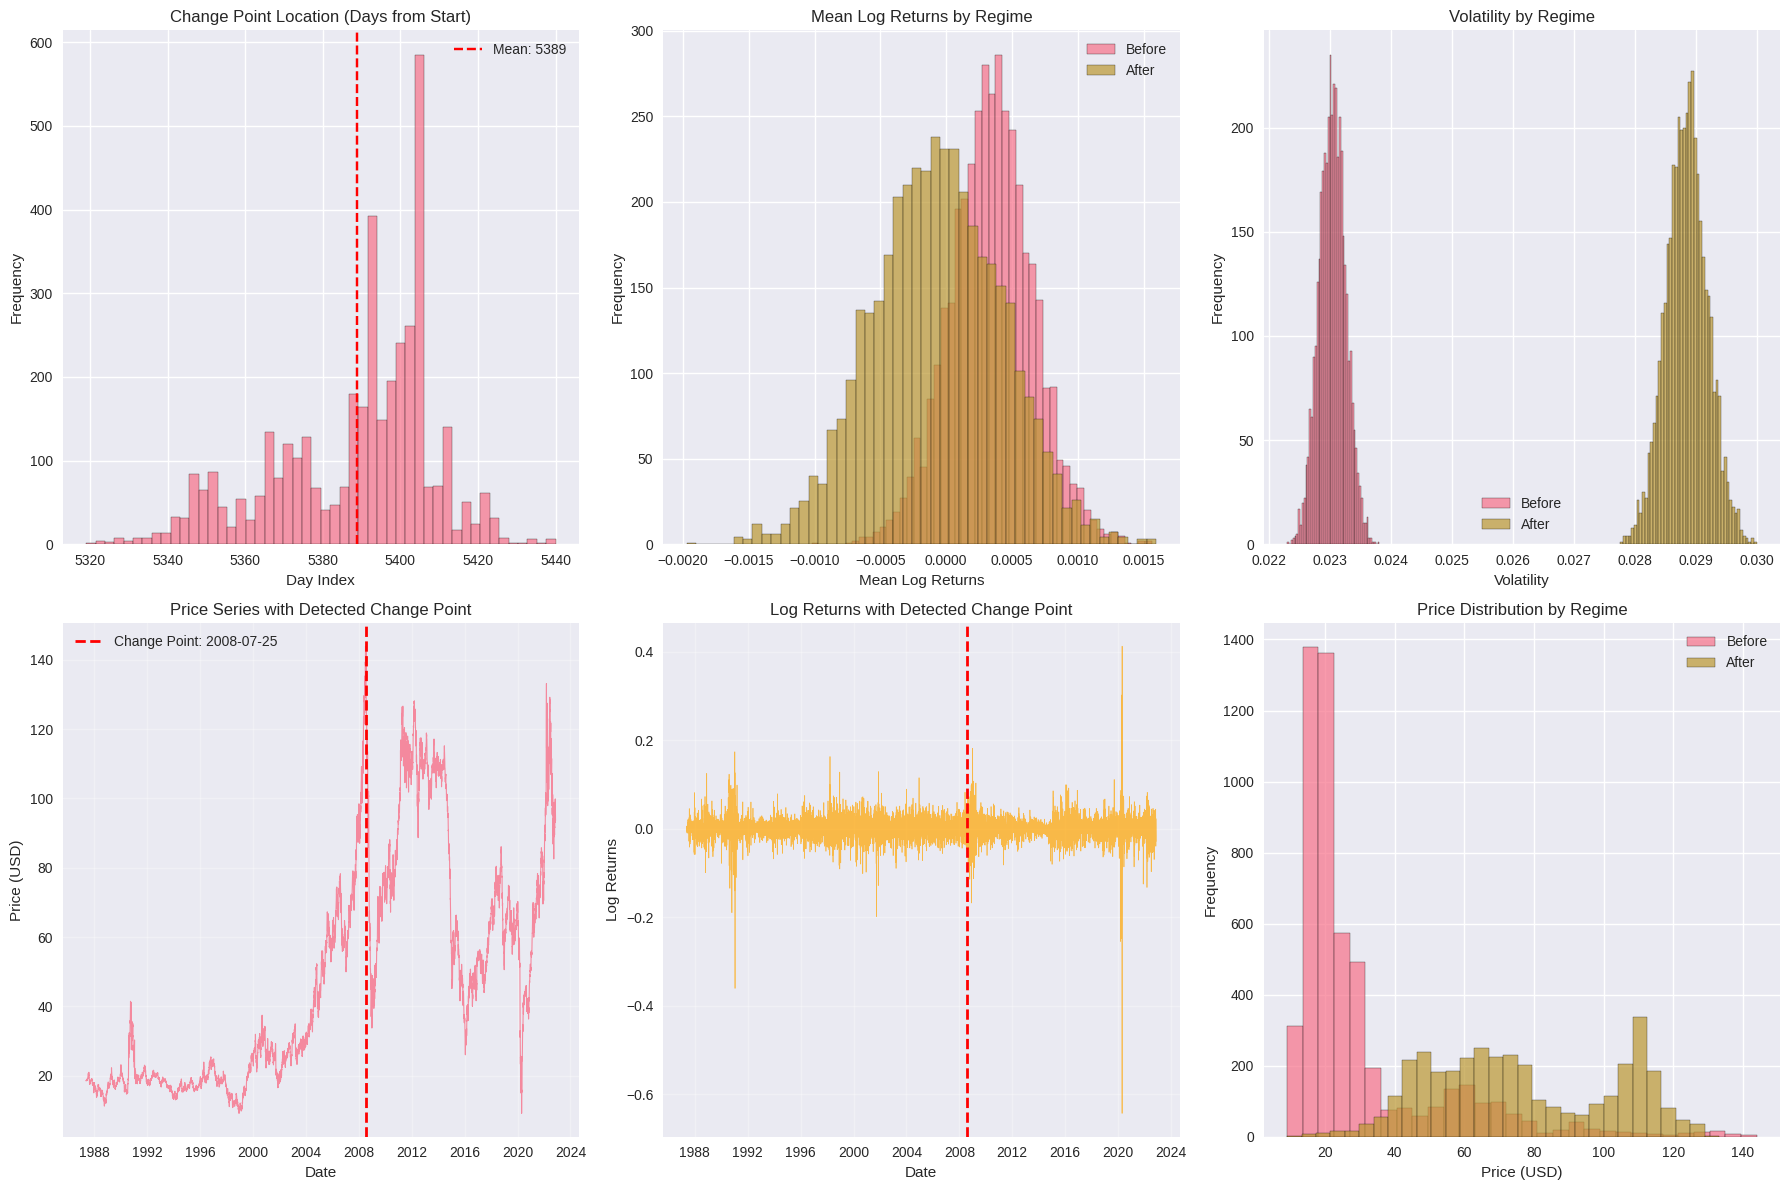


Associating change point with historical events (±30 days)...
No significant events found within the specified window.
This could indicate:
  - A gradual structural change rather than an event-driven change
  - Market anticipation of future events
  - Technical factors or market dynamics


In [ ]:
# Analyze results
results = analyzer.analyze_change_points()

Generating comprehensive analysis report...
Analyzing detected change points...

Change Point Analysis:
Most probable change point: 2008-07-25
95% credible interval: 2008-05-28 to 2008-09-23

Price Impact Analysis:
Mean price before change point: $29.68
Mean price after change point: $76.30
Price change: +157.08%
Volatility before change point: 21.68
Volatility after change point: 26.21
Volatility change: +20.86%


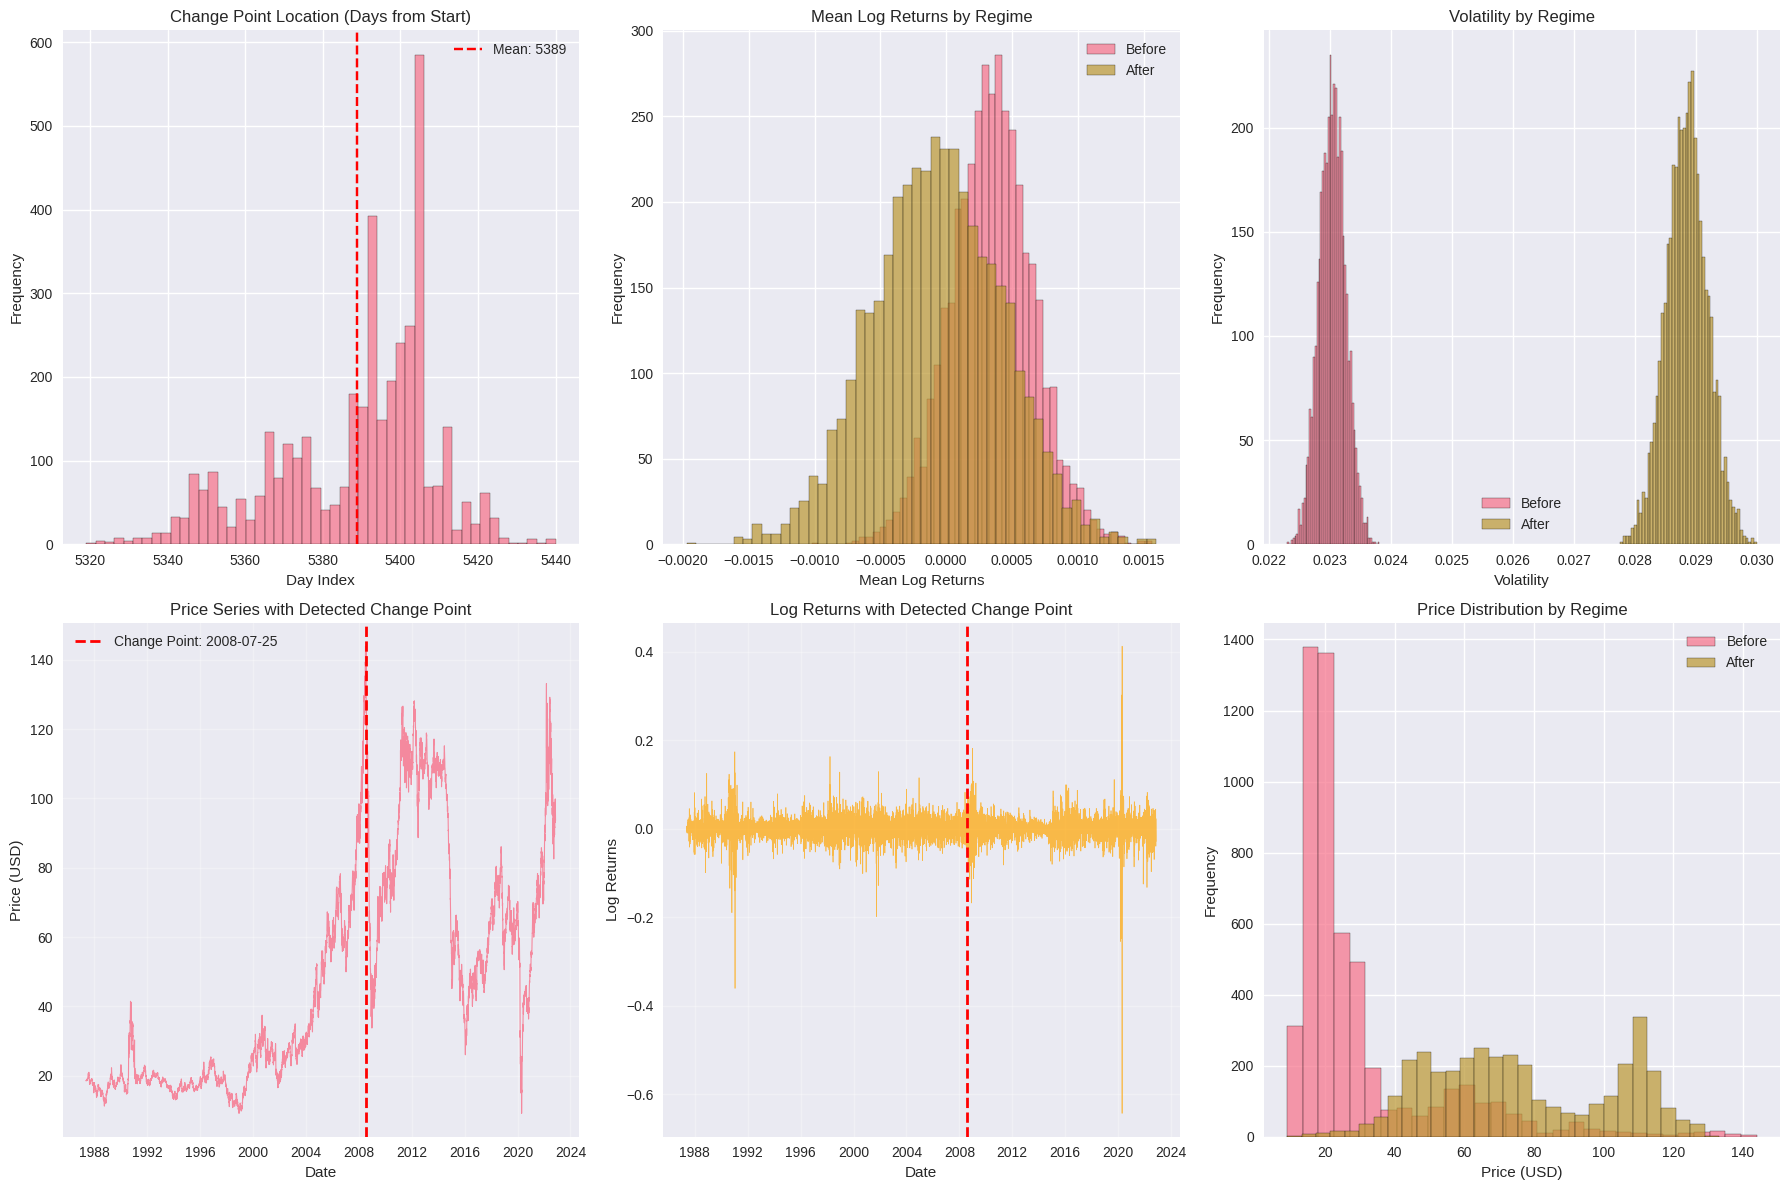


Associating change point with historical events (±30 days)...
No significant events found within the specified window.
This could indicate:
  - A gradual structural change rather than an event-driven change
  - Market anticipation of future events
  - Technical factors or market dynamics
Report saved to /content/drive/MyDrive/ChangePoint/change_point_analysis_report.txt

Analysis completed successfully!
Check the generated plots and report for detailed results.


In [ ]:
# Generate report
report = analyzer.generate_report('../data/processed/change_point_analysis_report.txt')

print("\nAnalysis completed successfully!")
print("Check the generated plots and report for detailed results.")